Please upload the performance_results.csv file:


Saving performance_results.csv to performance_results (31).csv
First 10 lines of the file:
Image,Dimensions(WxH),SerialTime(s),OpenMPTime(s),CUDATime(s),OpenMPSpeedup,CUDASpeedup,OpenMPEfficiency(%)
Ai,4736x2688,15.1998,6.74898,1.68964,2.25215,8.99585,14.076
Bulldog,5376x8064,54.7083,27.8341,5.3883,1.96551,10.1532,12.2845
City,4000x6000,30.2111,15.6531,3.17602,1.93004,9.51225,12.0628
Fire,3456x4608,19.9595,9.59877,2.14945,2.07938,9.28584,12.9961
Sea,2700x3840,12.7451,6.70214,1.63495,1.90165,7.79543,11.8853
Sky,3648x5472,24.8932,11.2333,2.49936,2.21602,9.95984,13.8501
Average,3986x5112,26.2862,12.9617,2.75629,2.02798,9.53681,12.6749

DataFrame loaded successfully
     Image Dimensions(WxH)  SerialTime(s)  OpenMPTime(s)  CUDATime(s)  \
0       Ai       4736x2688        15.1998        6.74898      1.68964   
1  Bulldog       5376x8064        54.7083       27.83410      5.38830   
2     City       4000x6000        30.2111       15.65310      3.17602   
3     Fire       3456x4608        19.

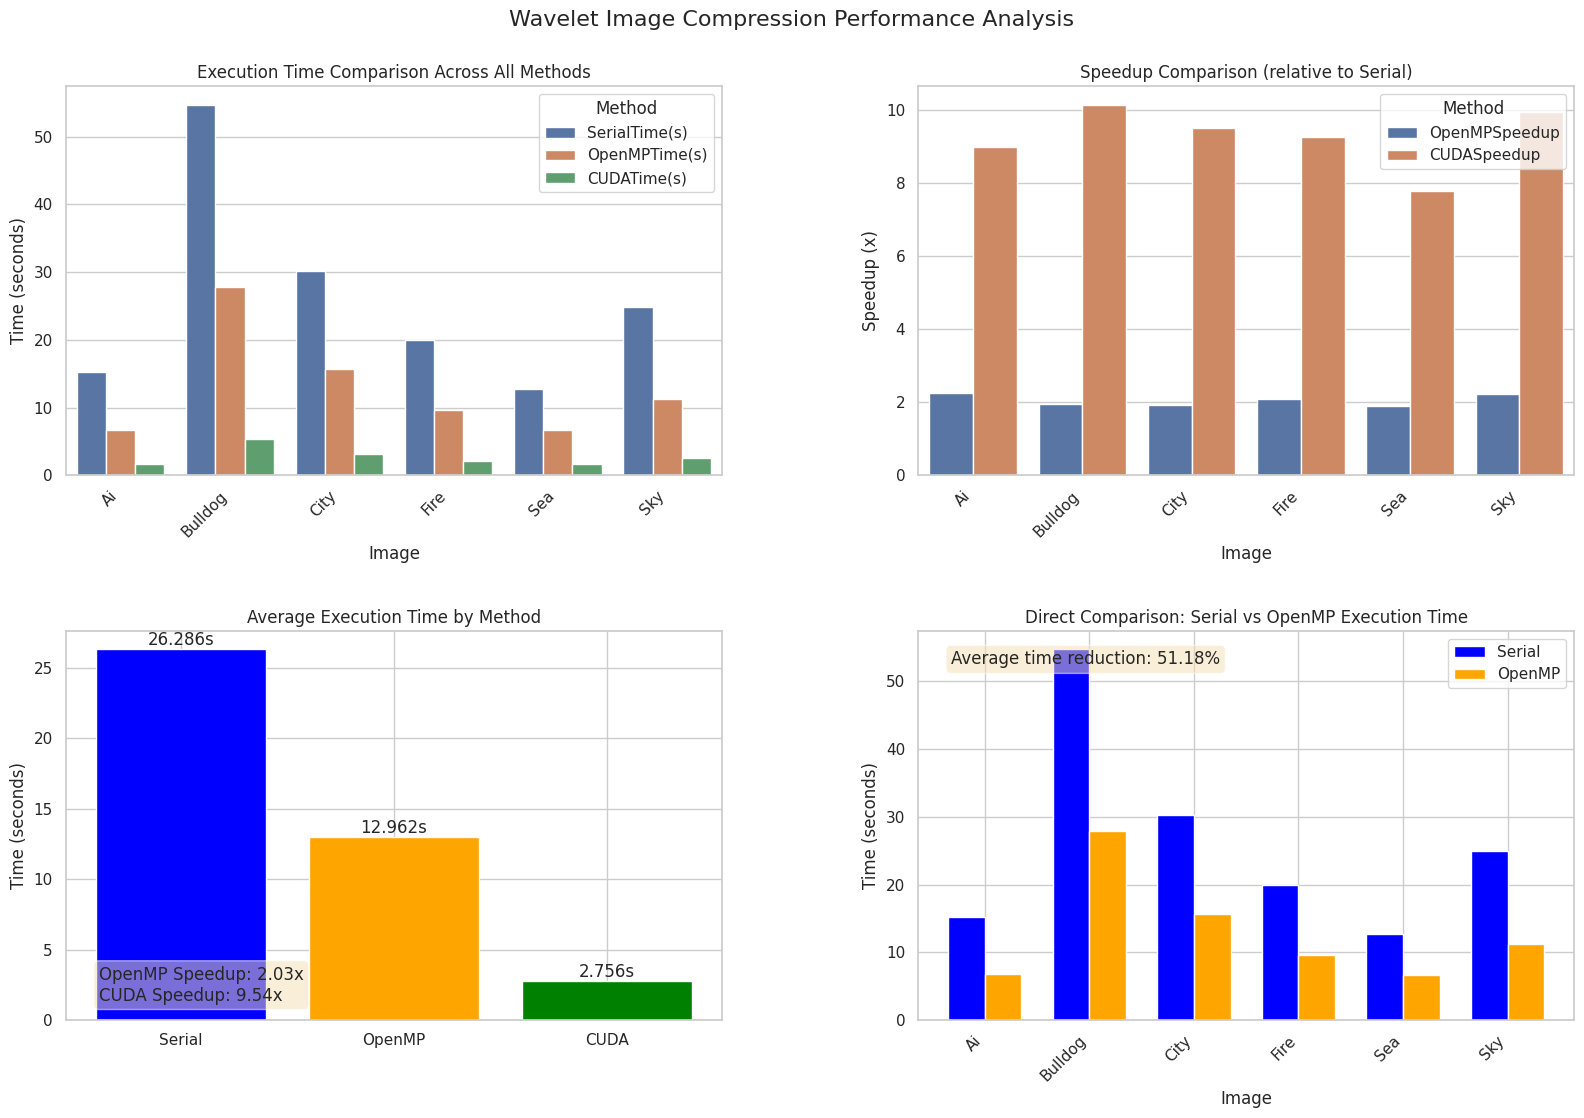

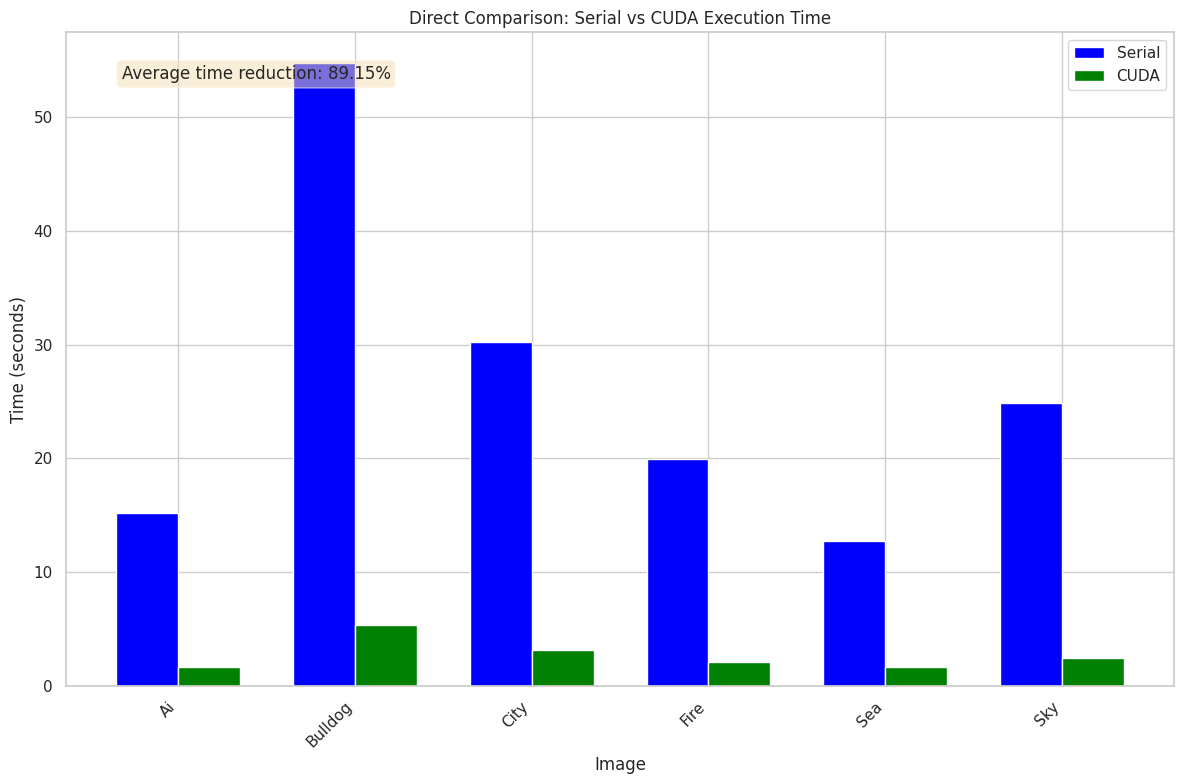


=== PERFORMANCE ANALYSIS ===
Average Serial Time: 26.2862 seconds
Average OpenMP Time: 12.9617 seconds
Average CUDA Time: 2.7563 seconds
OpenMP Average Speedup: 2.03x
CUDA Average Speedup: 9.54x

=== BEST PERFORMANCE ===
Best OpenMP speedup: 2.25x on image 'Ai'
Best CUDA speedup: 10.15x on image 'Bulldog'

=== WORST PERFORMANCE ===
Worst OpenMP speedup: 1.90x on image 'Sea'
Worst CUDA speedup: 7.80x on image 'Sea'

=== DIRECT COMPARISON ANALYSIS ===
OpenMP reduces execution time by 51.18% on average compared to Serial
CUDA reduces execution time by 89.15% on average compared to Serial
Greatest OpenMP improvement: 55.60% on image 'Ai'
Greatest CUDA improvement: 90.15% on image 'Bulldog'
Least OpenMP improvement: 47.41% on image 'Sea'
Least CUDA improvement: 87.17% on image 'Sea'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Step 1: Upload the CSV file
print("Please upload the performance_results.csv file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Load and analyze the data
# Print the first few lines of the file to debug
with open(filename, 'r') as f:
    print("First 10 lines of the file:")
    for i, line in enumerate(f):
        if i < 10:
            print(line.strip())
        else:
            break

# Try to load the CSV with different settings
try:
    df = pd.read_csv(filename)
    print("\nDataFrame loaded successfully")
    print(df.head())
    print("\nColumn types:")
    print(df.dtypes)
except Exception as e:
    print(f"Error loading CSV with default settings: {e}")
    try:
        # Try with different delimiter
        df = pd.read_csv(filename, sep=';')
        print("\nDataFrame loaded with semicolon delimiter")
        print(df.head())
    except Exception as e:
        print(f"Error loading CSV with semicolon delimiter: {e}")
        # Last resort - try to fix the CSV file
        try:
            with open(filename, 'r') as f:
                content = f.read()
            # Replace commas in numbers with dots if needed
            content = content.replace(',', '.')
            with open('fixed_' + filename, 'w') as f:
                f.write(content)
            df = pd.read_csv('fixed_' + filename)
            print("\nDataFrame loaded after fixing CSV")
            print(df.head())
        except Exception as e:
            print(f"Failed to fix and load CSV: {e}")
            raise

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Filter out configuration columns if they exist
config_columns_to_remove = [col for col in df.columns if any(x in col.lower() for x in ['thread', 'openmpthread', 'threshold', 'decomposition', 'config'])]
if config_columns_to_remove:
    print(f"\nRemoving configuration columns: {config_columns_to_remove}")
    df = df.drop(columns=config_columns_to_remove)

# Remove OpenMP Efficiency column if it exists
if 'OpenMPEfficiency(%)' in df.columns:
    print("\nRemoving OpenMP Efficiency column")
    df = df.drop(columns=['OpenMPEfficiency(%)'])

# Ensure all expected columns exist
required_columns = ['Image', 'SerialTime(s)', 'OpenMPTime(s)', 'CUDATime(s)', 'OpenMPSpeedup', 'CUDASpeedup']
for col in required_columns:
    if col not in df.columns:
        print(f"Warning: Column '{col}' is missing from the CSV file")

# Convert columns to appropriate data types
for col in df.columns:
    if col != 'Image':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except Exception as e:
            print(f"Warning: Could not convert column '{col}' to numeric: {e}")

# Skip the last row which contains averages
if 'Average' in df['Image'].values:
    data_rows = df[df['Image'] != 'Average']
    has_average = True
else:
    data_rows = df
    has_average = False

print(f"\nNumber of data rows (excluding average): {len(data_rows)}")

# Step 3: Set up the visualization style
sns.set(style="whitegrid")
# Create a figure with 2x2 layout
plt.figure(figsize=(16, 12))

try:
    # Plot 1: Execution times comparison (all methods)
    plt.subplot(2, 2, 1)

    # Safer way to reshape data for plotting
    time_cols = ['SerialTime(s)', 'OpenMPTime(s)', 'CUDATime(s)']
    plot_data = []

    for idx, row in data_rows.iterrows():
        for col in time_cols:
            if col in data_rows.columns:
                plot_data.append({
                    'Image': str(row['Image']),  # Convert to string to avoid TypeError
                    'Method': col,
                    'Time (seconds)': float(row[col])
                })

    plot_df = pd.DataFrame(plot_data)
    print("\nPlot data structure:")
    print(plot_df.head())

    sns.barplot(x='Image', y='Time (seconds)', hue='Method', data=plot_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Execution Time Comparison Across All Methods')
    plt.tight_layout()
except Exception as e:
    print(f"Error creating execution time plot: {e}")
    plt.subplot(2, 2, 1)
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Execution Time Comparison (Error)')

try:
    # Plot 2: Speedup comparison
    plt.subplot(2, 2, 2)

    # Safer way to reshape data for plotting
    speedup_cols = ['OpenMPSpeedup', 'CUDASpeedup']
    plot_data = []

    for idx, row in data_rows.iterrows():
        for col in speedup_cols:
            if col in data_rows.columns:
                plot_data.append({
                    'Image': str(row['Image']),  # Convert to string to avoid TypeError
                    'Method': col,
                    'Speedup (x)': float(row[col])
                })

    plot_df = pd.DataFrame(plot_data)

    sns.barplot(x='Image', y='Speedup (x)', hue='Method', data=plot_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Speedup Comparison (relative to Serial)')
    plt.tight_layout()
except Exception as e:
    print(f"Error creating speedup plot: {e}")
    plt.subplot(2, 2, 2)
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Speedup Comparison (Error)')

try:
    # Plot 3: Average performance metrics
    plt.subplot(2, 2, 3)

    if has_average:
        # Get the average row
        avg_row = df[df['Image'] == 'Average'].iloc[0]
        methods = ['Serial', 'OpenMP', 'CUDA']
        times = [float(avg_row['SerialTime(s)']),
                float(avg_row['OpenMPTime(s)']),
                float(avg_row['CUDATime(s)'])]

        # Create bar chart of average times
        bars = plt.bar(methods, times, color=['blue', 'orange', 'green'])

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}s',
                    ha='center', va='bottom')

        plt.title('Average Execution Time by Method')
        plt.ylabel('Time (seconds)')
        plt.tight_layout()

        # Display speedup in a text box (no efficiency now)
        if all(col in avg_row.index for col in ['OpenMPSpeedup', 'CUDASpeedup']):
            textstr = f'OpenMP Speedup: {float(avg_row["OpenMPSpeedup"]):.2f}x\n'
            textstr += f'CUDA Speedup: {float(avg_row["CUDASpeedup"]):.2f}x'

            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.annotate(textstr, xy=(0.05, 0.05), xycoords='axes fraction', bbox=props)
    else:
        # Calculate averages manually if there's no average row
        avg_serial = data_rows['SerialTime(s)'].mean()
        avg_openmp = data_rows['OpenMPTime(s)'].mean()
        avg_cuda = data_rows['CUDATime(s)'].mean()

        methods = ['Serial', 'OpenMP', 'CUDA']
        times = [avg_serial, avg_openmp, avg_cuda]

        # Create bar chart of average times
        bars = plt.bar(methods, times, color=['blue', 'orange', 'green'])

        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}s',
                    ha='center', va='bottom')

        plt.title('Average Execution Time by Method')
        plt.ylabel('Time (seconds)')
        plt.tight_layout()

        # Calculate and display speedup (no efficiency now)
        if all(col in data_rows.columns for col in ['OpenMPSpeedup', 'CUDASpeedup']):
            avg_openmp_speedup = data_rows['OpenMPSpeedup'].mean()
            avg_cuda_speedup = data_rows['CUDASpeedup'].mean()

            textstr = f'OpenMP Speedup: {avg_openmp_speedup:.2f}x\n'
            textstr += f'CUDA Speedup: {avg_cuda_speedup:.2f}x'

            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            plt.annotate(textstr, xy=(0.05, 0.05), xycoords='axes fraction', bbox=props)
except Exception as e:
    print(f"Error creating average performance plot: {e}")
    plt.subplot(2, 2, 3)
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Average Performance (Error)')

# NEW PLOT 4: Direct comparison between Serial and OpenMP
try:
    plt.subplot(2, 2, 4)

    # Create dataframe for direct comparison (Serial vs OpenMP)
    serial_openmp_data = []
    for idx, row in data_rows.iterrows():
        serial_openmp_data.append({
            'Image': str(row['Image']),
            'Serial': float(row['SerialTime(s)']),
            'OpenMP': float(row['OpenMPTime(s)'])
        })

    serial_openmp_df = pd.DataFrame(serial_openmp_data)

    # Set width of bars
    barWidth = 0.35

    # Set positions of the bars on X axis
    r1 = np.arange(len(serial_openmp_df))
    r2 = [x + barWidth for x in r1]

    # Create the bars
    plt.bar(r1, serial_openmp_df['Serial'], width=barWidth, label='Serial', color='blue')
    plt.bar(r2, serial_openmp_df['OpenMP'], width=barWidth, label='OpenMP', color='orange')

    # Add labels and legend
    plt.xlabel('Image')
    plt.ylabel('Time (seconds)')
    plt.title('Direct Comparison: Serial vs OpenMP Execution Time')
    plt.xticks([r + barWidth/2 for r in range(len(serial_openmp_df))], serial_openmp_df['Image'], rotation=45, ha='right')
    plt.legend()

    # Calculate average improvement percentage
    avg_improvement = ((serial_openmp_df['Serial'] - serial_openmp_df['OpenMP']) / serial_openmp_df['Serial'] * 100).mean()

    # Add text annotation for average improvement
    textstr = f'Average time reduction: {avg_improvement:.2f}%'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.annotate(textstr, xy=(0.05, 0.95), xycoords='axes fraction', bbox=props, va='top')

except Exception as e:
    print(f"Error creating Serial vs OpenMP comparison plot: {e}")
    plt.subplot(2, 2, 4)
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Serial vs OpenMP Comparison (Error)')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Wavelet Image Compression Performance Analysis', fontsize=16, y=0.98)
plt.savefig('performance_visualization_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a new figure for Serial vs CUDA comparison
plt.figure(figsize=(12, 8))

# NEW PLOT: Direct comparison between Serial and CUDA
try:
    # Create dataframe for direct comparison (Serial vs CUDA)
    serial_cuda_data = []
    for idx, row in data_rows.iterrows():
        serial_cuda_data.append({
            'Image': str(row['Image']),
            'Serial': float(row['SerialTime(s)']),
            'CUDA': float(row['CUDATime(s)'])
        })

    serial_cuda_df = pd.DataFrame(serial_cuda_data)

    # Set width of bars
    barWidth = 0.35

    # Set positions of the bars on X axis
    r1 = np.arange(len(serial_cuda_df))
    r2 = [x + barWidth for x in r1]

    # Create the bars
    plt.bar(r1, serial_cuda_df['Serial'], width=barWidth, label='Serial', color='blue')
    plt.bar(r2, serial_cuda_df['CUDA'], width=barWidth, label='CUDA', color='green')

    # Add labels and legend
    plt.xlabel('Image')
    plt.ylabel('Time (seconds)')
    plt.title('Direct Comparison: Serial vs CUDA Execution Time')
    plt.xticks([r + barWidth/2 for r in range(len(serial_cuda_df))], serial_cuda_df['Image'], rotation=45, ha='right')
    plt.legend()

    # Calculate average improvement percentage
    avg_improvement = ((serial_cuda_df['Serial'] - serial_cuda_df['CUDA']) / serial_cuda_df['Serial'] * 100).mean()

    # Add text annotation for average improvement
    textstr = f'Average time reduction: {avg_improvement:.2f}%'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.annotate(textstr, xy=(0.05, 0.95), xycoords='axes fraction', bbox=props, va='top')

except Exception as e:
    print(f"Error creating Serial vs CUDA comparison plot: {e}")
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Serial vs CUDA Comparison (Error)')

plt.tight_layout()
plt.savefig('performance_visualization_2.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate additional insights
print("\n=== PERFORMANCE ANALYSIS ===")

try:
    if has_average:
        avg_row = df[df['Image'] == 'Average'].iloc[0]
        print(f"Average Serial Time: {float(avg_row['SerialTime(s)']):.4f} seconds")
        print(f"Average OpenMP Time: {float(avg_row['OpenMPTime(s)']):.4f} seconds")
        print(f"Average CUDA Time: {float(avg_row['CUDATime(s)']):.4f} seconds")
        print(f"OpenMP Average Speedup: {float(avg_row['OpenMPSpeedup']):.2f}x")
        print(f"CUDA Average Speedup: {float(avg_row['CUDASpeedup']):.2f}x")
    else:
        # Calculate averages manually
        avg_serial = data_rows['SerialTime(s)'].mean()
        avg_openmp = data_rows['OpenMPTime(s)'].mean()
        avg_cuda = data_rows['CUDATime(s)'].mean()
        avg_openmp_speedup = data_rows['OpenMPSpeedup'].mean()
        avg_cuda_speedup = data_rows['CUDASpeedup'].mean()

        print(f"Average Serial Time: {avg_serial:.4f} seconds")
        print(f"Average OpenMP Time: {avg_openmp:.4f} seconds")
        print(f"Average CUDA Time: {avg_cuda:.4f} seconds")
        print(f"OpenMP Average Speedup: {avg_openmp_speedup:.2f}x")
        print(f"CUDA Average Speedup: {avg_cuda_speedup:.2f}x")

    # Find best and worst cases
    best_openmp = data_rows.loc[data_rows['OpenMPSpeedup'].idxmax()]
    best_cuda = data_rows.loc[data_rows['CUDASpeedup'].idxmax()]
    worst_openmp = data_rows.loc[data_rows['OpenMPSpeedup'].idxmin()]
    worst_cuda = data_rows.loc[data_rows['CUDASpeedup'].idxmin()]

    print("\n=== BEST PERFORMANCE ===")
    print(f"Best OpenMP speedup: {float(best_openmp['OpenMPSpeedup']):.2f}x on image '{best_openmp['Image']}'")
    print(f"Best CUDA speedup: {float(best_cuda['CUDASpeedup']):.2f}x on image '{best_cuda['Image']}'")

    print("\n=== WORST PERFORMANCE ===")
    print(f"Worst OpenMP speedup: {float(worst_openmp['OpenMPSpeedup']):.2f}x on image '{worst_openmp['Image']}'")
    print(f"Worst CUDA speedup: {float(worst_cuda['CUDASpeedup']):.2f}x on image '{worst_cuda['Image']}'")

    # NEW - Additional analysis for direct comparisons
    print("\n=== DIRECT COMPARISON ANALYSIS ===")
    # Calculate average time reduction percentages
    openmp_reduction = ((data_rows['SerialTime(s)'] - data_rows['OpenMPTime(s)']) / data_rows['SerialTime(s)'] * 100).mean()
    cuda_reduction = ((data_rows['SerialTime(s)'] - data_rows['CUDATime(s)']) / data_rows['SerialTime(s)'] * 100).mean()

    print(f"OpenMP reduces execution time by {openmp_reduction:.2f}% on average compared to Serial")
    print(f"CUDA reduces execution time by {cuda_reduction:.2f}% on average compared to Serial")

    # Find images with the greatest and least improvement
    openmp_improvement = (data_rows['SerialTime(s)'] - data_rows['OpenMPTime(s)']) / data_rows['SerialTime(s)'] * 100
    cuda_improvement = (data_rows['SerialTime(s)'] - data_rows['CUDATime(s)']) / data_rows['SerialTime(s)'] * 100

    best_openmp_img = data_rows.iloc[openmp_improvement.idxmax()]['Image']
    best_cuda_img = data_rows.iloc[cuda_improvement.idxmax()]['Image']
    worst_openmp_img = data_rows.iloc[openmp_improvement.idxmin()]['Image']
    worst_cuda_img = data_rows.iloc[cuda_improvement.idxmin()]['Image']

    print(f"Greatest OpenMP improvement: {openmp_improvement.max():.2f}% on image '{best_openmp_img}'")
    print(f"Greatest CUDA improvement: {cuda_improvement.max():.2f}% on image '{best_cuda_img}'")
    print(f"Least OpenMP improvement: {openmp_improvement.min():.2f}% on image '{worst_openmp_img}'")
    print(f"Least CUDA improvement: {cuda_improvement.min():.2f}% on image '{worst_cuda_img}'")

except Exception as e:
    print(f"Error generating performance analysis: {e}")

# Download the generated visualizations
try:
    files.download('performance_visualization_1.png')
    files.download('performance_visualization_2.png')
except Exception as e:
    print(f"Error downloading visualizations: {e}")

Please upload the performance_results.csv file:


Saving performance_results.csv to performance_results (30).csv

DataFrame loaded successfully
     Image Dimensions(WxH)  SerialTime(s)  OpenMPTime(s)  CUDATime(s)  \
0       Ai       4736x2688        15.1998        6.74898      1.68964   
1  Bulldog       5376x8064        54.7083       27.83410      5.38830   
2     City       4000x6000        30.2111       15.65310      3.17602   
3     Fire       3456x4608        19.9595        9.59877      2.14945   
4      Sea       2700x3840        12.7451        6.70214      1.63495   

   OpenMPSpeedup  CUDASpeedup  OpenMPEfficiency(%)  
0        2.25215      8.99585              14.0760  
1        1.96551     10.15320              12.2845  
2        1.93004      9.51225              12.0628  
3        2.07938      9.28584              12.9961  
4        1.90165      7.79543              11.8853  

Extracted dimensions and calculated megapixels:
  Dimensions(WxH)  Width  Height  MegaPixels
0       4736x2688   4736    2688   12.730368
1       53

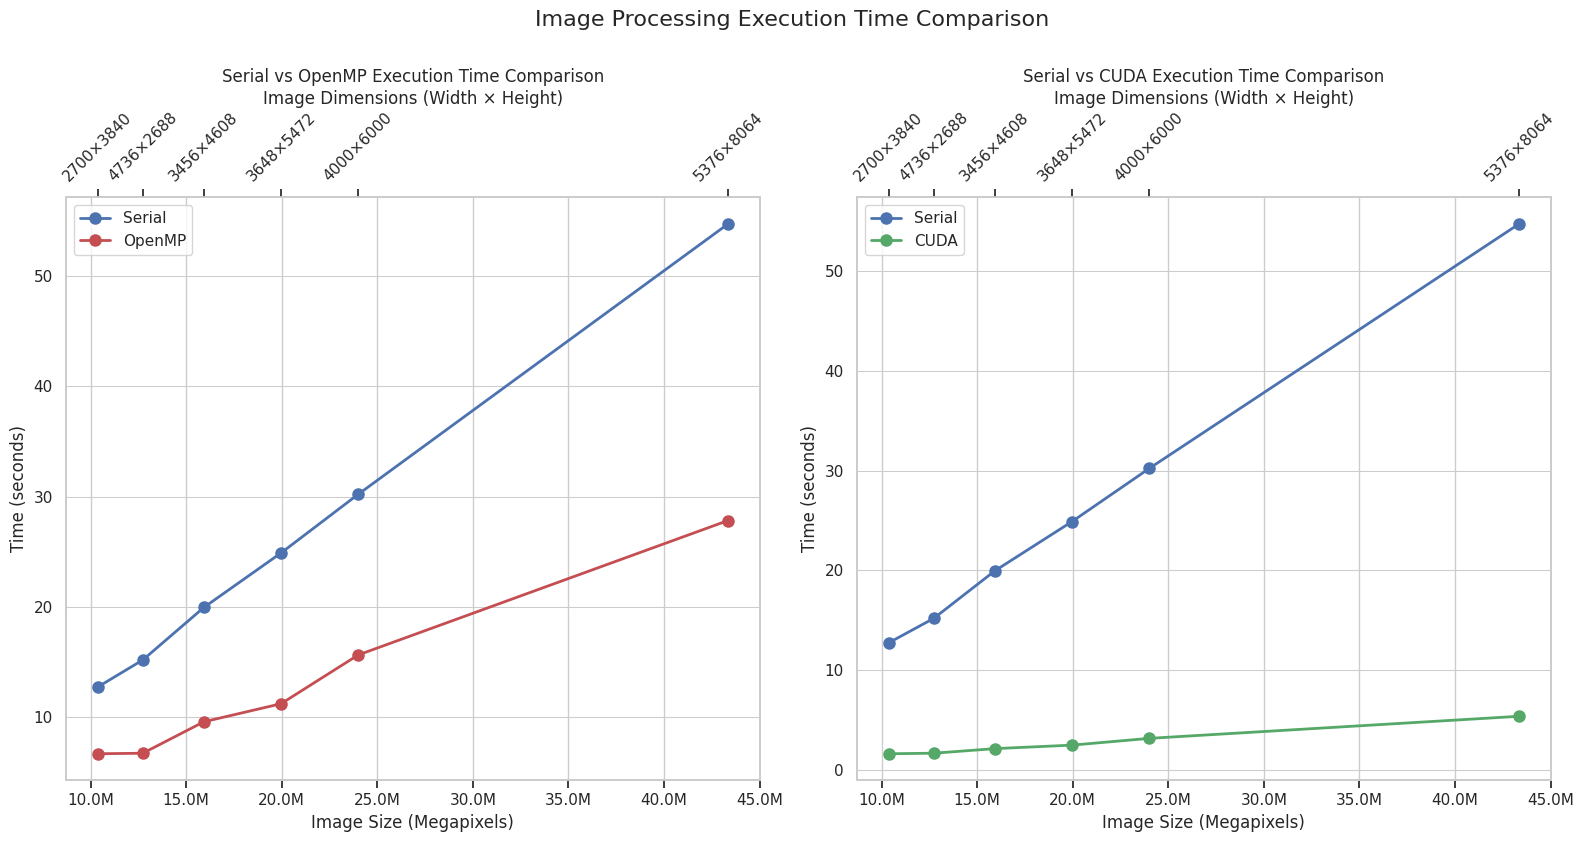


=== PERFORMANCE SUMMARY ===
Average Serial Time: 26.2862 seconds
Average OpenMP Time: 12.9617 seconds
Average CUDA Time: 2.7563 seconds
OpenMP Average Speedup: 2.03x
CUDA Average Speedup: 9.54x


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import re

# Step 1: Upload the CSV file
print("Please upload the performance_results.csv file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Load and analyze the data
try:
    df = pd.read_csv(filename)
    print("\nDataFrame loaded successfully")
    print(df.head())
except Exception as e:
    print(f"Error loading CSV with default settings: {e}")
    try:
        # Try with different delimiter
        df = pd.read_csv(filename, sep=';')
        print("\nDataFrame loaded with semicolon delimiter")
        print(df.head())
    except Exception as e:
        print(f"Error loading CSV with semicolon delimiter: {e}")
        raise

# Process the dimensions column
if 'Dimensions(WxH)' in df.columns:
    # Extract width and height from the 'WxH' format
    df[['Width', 'Height']] = df['Dimensions(WxH)'].str.extract(r'(\d+)x(\d+)').astype(int)

    # Calculate total pixels and convert to megapixels
    df['TotalPixels'] = df['Width'] * df['Height']
    df['MegaPixels'] = df['TotalPixels'] / 1_000_000  # Convert to megapixels

    print("\nExtracted dimensions and calculated megapixels:")
    print(df[['Dimensions(WxH)', 'Width', 'Height', 'MegaPixels']].head())
else:
    print("Dimensions column not found. Please make sure your CSV has a 'Dimensions(WxH)' column.")
    raise ValueError("Missing dimensions column")

# Skip the last row which contains averages
if 'Average' in df['Image'].values:
    data_rows = df[df['Image'] != 'Average']
    has_average = True
else:
    data_rows = df
    has_average = False

print(f"\nNumber of data rows (excluding average): {len(data_rows)}")

# Sort by total pixels (ascending)
data_rows = data_rows.sort_values(by='TotalPixels')

# Set up the visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))

try:
    # Plot 1: Serial vs OpenMP Execution Times - Line Graph
    plt.subplot(1, 2, 1)

    plt.plot(data_rows['MegaPixels'], data_rows['SerialTime(s)'], 'bo-', linewidth=2, markersize=8, label='Serial')
    plt.plot(data_rows['MegaPixels'], data_rows['OpenMPTime(s)'], 'ro-', linewidth=2, markersize=8, label='OpenMP')

    plt.xlabel('Image Size (Megapixels)')
    plt.ylabel('Time (seconds)')
    plt.title('Serial vs OpenMP Execution Time Comparison')
    plt.legend()

    # Only show horizontal grid lines
    ax1 = plt.gca()
    ax1.grid(which='major', axis='y', linestyle='-', linewidth=0.75)

    # Format x-axis to display with 'M' suffix for megapixels
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:.1f}M"))

    # Add second x-axis with dimensions
    ax1_top = ax1.twiny()
    ax1_top.set_xlim(ax1.get_xlim())
    ax1_top.set_xticks(data_rows['MegaPixels'])
    ax1_top.set_xticklabels([f"{w}×{h}" for w, h in zip(data_rows['Width'], data_rows['Height'])], rotation=45)
    ax1_top.set_xlabel('Image Dimensions (Width × Height)')
    ax1_top.grid(False)  # Ensure no grid lines from top axis

except Exception as e:
    print(f"Error creating Serial vs OpenMP plot: {e}")
    plt.subplot(1, 2, 1)
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Serial vs OpenMP (Error)')

try:
    # Plot 2: Serial vs CUDA Execution Times - Line Graph
    plt.subplot(1, 2, 2)

    plt.plot(data_rows['MegaPixels'], data_rows['SerialTime(s)'], 'bo-', linewidth=2, markersize=8, label='Serial')
    plt.plot(data_rows['MegaPixels'], data_rows['CUDATime(s)'], 'go-', linewidth=2, markersize=8, label='CUDA')

    plt.xlabel('Image Size (Megapixels)')
    plt.ylabel('Time (seconds)')
    plt.title('Serial vs CUDA Execution Time Comparison')
    plt.legend()

    # Only show horizontal grid lines
    ax2 = plt.gca()
    ax2.grid(which='major', axis='y', linestyle='-', linewidth=0.75)

    # Format x-axis to display with 'M' suffix for megapixels
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x:.1f}M"))

    # Add second x-axis with dimensions
    ax2_top = ax2.twiny()
    ax2_top.set_xlim(ax2.get_xlim())
    ax2_top.set_xticks(data_rows['MegaPixels'])
    ax2_top.set_xticklabels([f"{w}×{h}" for w, h in zip(data_rows['Width'], data_rows['Height'])], rotation=45)
    ax2_top.set_xlabel('Image Dimensions (Width × Height)')
    ax2_top.grid(False)  # Ensure no grid lines from top axis

except Exception as e:
    print(f"Error creating Serial vs CUDA plot: {e}")
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, f"Error creating plot: {str(e)}", ha='center', va='center')
    plt.title('Serial vs CUDA (Error)')

plt.tight_layout()
plt.suptitle('Image Processing Execution Time Comparison', fontsize=16, y=1.05)
plt.savefig('execution_time_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate summary statistics
print("\n=== PERFORMANCE SUMMARY ===")
try:
    if has_average:
        avg_row = df[df['Image'] == 'Average'].iloc[0]
        print(f"Average Serial Time: {float(avg_row['SerialTime(s)']):.4f} seconds")
        print(f"Average OpenMP Time: {float(avg_row['OpenMPTime(s)']):.4f} seconds")
        print(f"Average CUDA Time: {float(avg_row['CUDATime(s)']):.4f} seconds")
        print(f"OpenMP Average Speedup: {float(avg_row['OpenMPSpeedup']):.2f}x")
        print(f"CUDA Average Speedup: {float(avg_row['CUDASpeedup']):.2f}x")
    else:
        # Calculate averages manually
        avg_serial = data_rows['SerialTime(s)'].mean()
        avg_openmp = data_rows['OpenMPTime(s)'].mean()
        avg_cuda = data_rows['CUDATime(s)'].mean()
        avg_openmp_speedup = data_rows['OpenMPSpeedup'].mean()
        avg_cuda_speedup = data_rows['CUDASpeedup'].mean()

        print(f"Average Serial Time: {avg_serial:.4f} seconds")
        print(f"Average OpenMP Time: {avg_openmp:.4f} seconds")
        print(f"Average CUDA Time: {avg_cuda:.4f} seconds")
        print(f"OpenMP Average Speedup: {avg_openmp_speedup:.2f}x")
        print(f"CUDA Average Speedup: {avg_cuda_speedup:.2f}x")
except Exception as e:
    print(f"Error generating performance summary: {e}")

# Download the generated visualization
try:
    files.download('execution_time_comparison.png')
except Exception as e:
    print(f"Error downloading visualization: {e}")